In [46]:
import pandas as pd
from scipy import stats
import numpy as np
from math import sqrt

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

sns.set()
import warnings
warnings.simplefilter('ignore')


%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 11,9

Populating the interactive namespace from numpy and matplotlib


### Первая часть

In [2]:
# загружаем датасет
data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


#### Посчитать руками статистики $\bar{X}, s^2, \mu, MODE, X_{0.75} - X_{0.25}$ для поля mean symmetry

In [35]:
trg = df['mean symmetry']
len_t = len(trg) #длина не делится н 2 и 4, поэтому при расчете медианы и iqr надо будет брать среднее значений
#выборрочное среднее
mean = sum([x for x in trg])/len_t
print("MEAN %0.4f"%mean)
#выборочное std
std = sqrt(sum([(x - mean)**2 for x in trg])/(len_t-1))
print("STD %0.4f" % std)
#медиана
trg_sort = sorted(trg)
median = (trg_sort[len_t//2] + trg_sort[len_t//2+1])/2
print("MEDIAN %0.4f" % median)
#мода
mode = trg.mode().reset_index()[0].tolist()
print("MODE ",mode)
#IQR
iqr = (trg_sort[3*len_t//4] + trg_sort[3*len_t//4 + 1])/2 - (trg_sort[len_t//4] + trg_sort[len_t//4 + 1])/2
print("IQR %0.4f" % iqr)

MEAN 0.1812
STD 0.0274
MEDIAN 0.1792
MODE  [0.1601, 0.1714, 0.1717, 0.1769, 0.1893]
IQR 0.0338


In [6]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### С помощью seaborn найти пару наиболее зависимых и независимых признаков среди первых 5

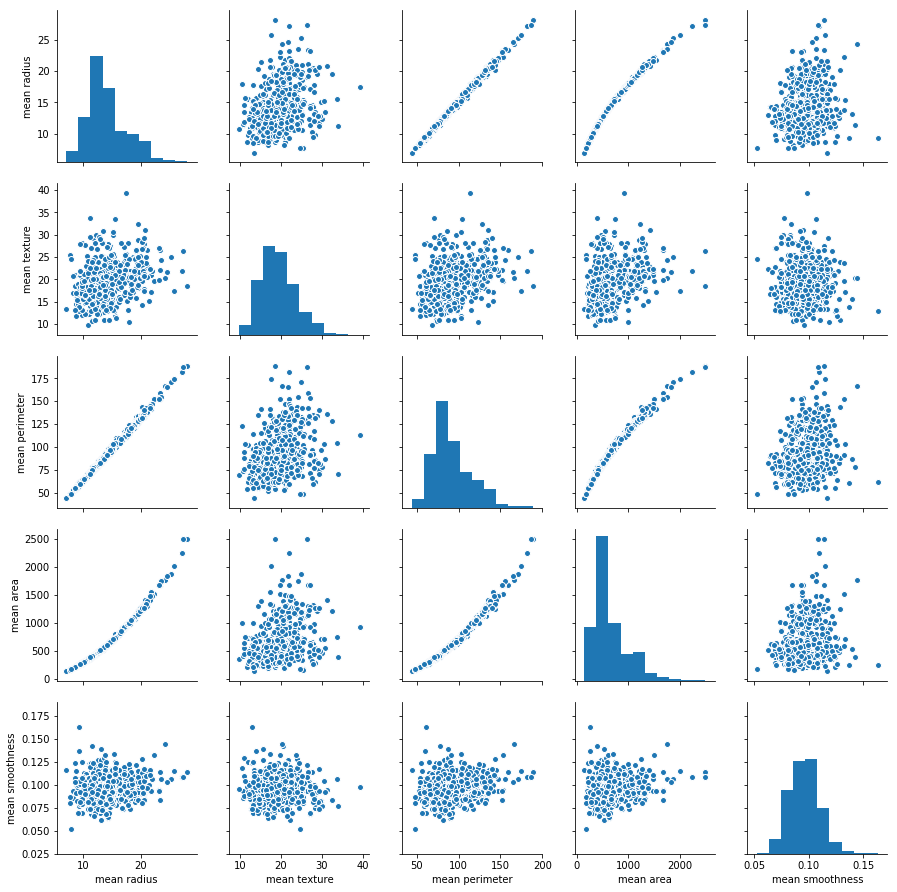

In [37]:
# your solution is here
trg_5 = df.iloc[:,:5]
sns.pairplot(trg_5, vars=trg_5.columns)  

#### С помощью матрицы корреляций найти пару наиболее зависимых и независимых признаков среди первых 5

In [38]:
# your solution is here
trg_5.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278
mean area,0.987357,0.321086,0.986507,1.000000,0.177028
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000


По графикам и корреляционной матрице видим, что наиболее зависимыми оказались признаки mean radius и mean perimeter
Наименее зависимые (коррелиция близка к нулю) - mean smoothness и mean area

#### Проверить руками гипотезу $H_0: M_{mean\ compactness} = 0$ 

In [43]:
# your solution is here
stats.ttest_1samp(df["mean compactness"],0)
#p-value меньше уровня значимости в 0.05, что говорит нам о том, что мы можем отклонить нулевую гипотезу  о том, что среднее значение mean compactness = 0

Ttest_1sampResult(statistic=47.12726263249825, pvalue=2.0059202200488077e-198)

#### Нарисовать распределение признака worst texture с помощью
- диаграммы
- qq-plot
- эмпирическая ф.р.

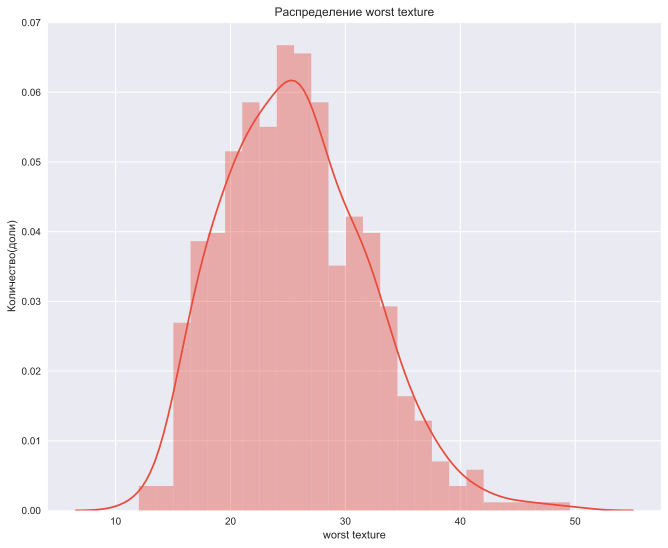

In [47]:
ax = sns.distplot(df['worst texture'], bins = 25, color = "#e74c3c")
ax.set_xlabel('worst texture')
ax.set_ylabel('Количество(доли)')
ax.set_title('Распределение worst texture');

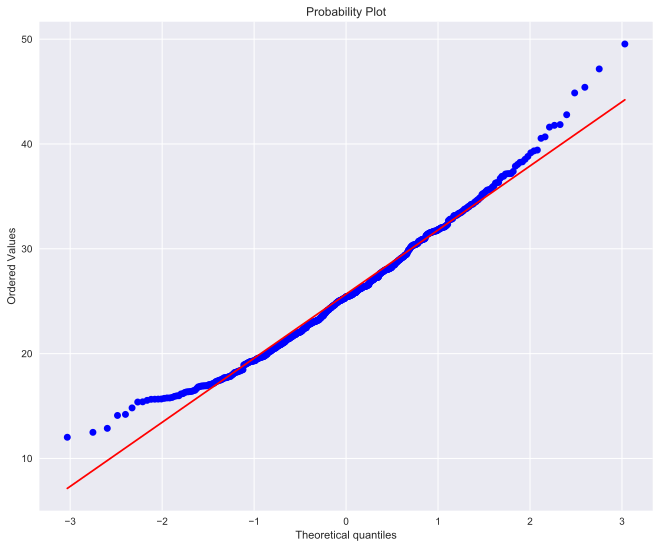

In [48]:
x = df['worst texture']
res = stats.probplot(x, plot=plt)

По графику qq plot можем видеть, что наше распределение имеет позитивный скос (positive skew)
Точки нашего графика получаются над прямой, что значит, что мы получаем слишком высокие значения чем должны бы были получить.С правой стороны от нуля значения графика выше прямой линии, это значит, что наши максимальные значения слишком высоки для значений нормального распределения, слева от нуля наши значения также выше линии, это значит, что у нас не хватает минимальных значений, то есть наш минимум недостаточно сильно отклонился от среднего значения.
Эти выводы полностью подтверждаются диаграммой выше. Справа от среднего мы видим удлиненный хвост: значений вконце по нормальному распределению быть не должно , но они есть. Слева от среднего наши значения наоборот быстро обрываются, резко становятся маленькими, для нормального распределения не хватает еще минимальных значений.

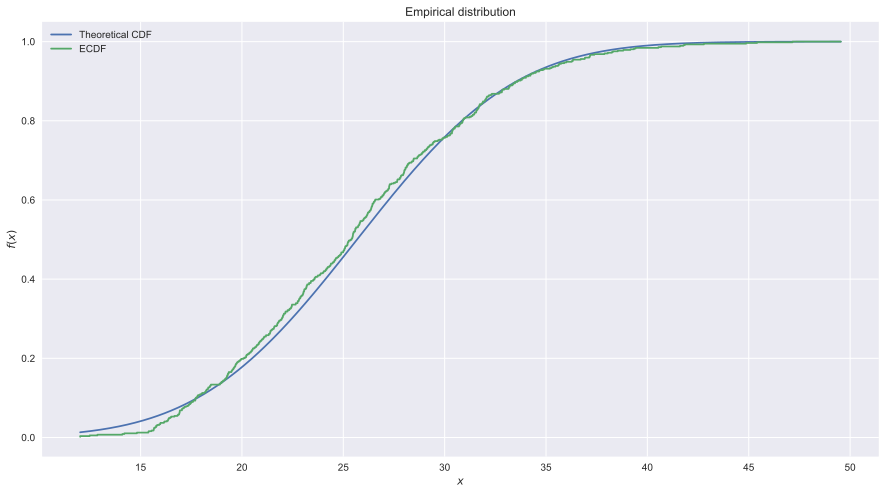

In [188]:
from statsmodels.distributions.empirical_distribution import ECDF

norm_rv = stats.norm(df['worst texture'].mean(), df['worst texture'].std())
sample = norm_rv.rvs(100)

x = np.linspace(df['worst texture'].min(),df['worst texture'].max(),len(df['worst texture']))
cdf = norm_rv.cdf(x)

plt.figure(figsize=(15,8))
plt.plot(x, cdf, label='Theoretical CDF')

ecdf = ECDF(df['worst texture'])
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.title("Empirical distribution")
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');

Можем видеть, что распределение worst texture фактически приближается к нормальному.Однако, опять же, что уже указывалось выше, до нормального нам не хватает минимальных значений (левый хвост ECDF ниже соответствующего нормального) и также можно сделать вывод, что график диаграммы распределения будет иметь positive skew (уже обсуждалось выше). Это можно видеть по тому, что на расстоянии +/- 5 от среднего график эмпирической функции выше теоретической, то есть в этом промежутке мы имее больше значений чем пологалось бы. В то время как в промежутке примерно от 8 до 18 график ниже, то есть, мы имее меньше значений чем пологалось бы.

### Вторая часть

Сгенерируйте выборку из пуассоновского распределения $Pois(\theta)$ для $\theta = 2$, записав
ее в виде матрицы ${\{X_{ij}\}}_{i=1...N, j=1...K}$ где $N= 1000$ и $K = 10000$.

Выполните следующую процедуру для всех $n=2, ...N$. Для всех $j = 1...K$ по выборке $\{X_{ij}\}_{i=1...n}$ оцените параметр $\theta$ с помощью оценки выборочного среднего $\hat{\theta_j^n}$ и оценки $\tilde{\theta}_j^n = \frac{1}{n-1} \sum_{i=1}^n\left(X_{ij} - \frac1n \sum_{i=1}^n X_{ij}\right)^2$. По выборкам $\{\hat{\theta}_j^n\}_{j=1...K}$ и $\{\tilde{\theta}_j^n\}_{j=1...K}$ для этих двух типов оценок найдите оценки дисперсий $\hat{\sigma}_n$ $\tilde{\sigma}_n$

Нарисуйте график оценок дисперсий в зависимости от $n$. При необходимости не забывайте выставлять значение plt.ylim. Сделайте выводы. **Постарайтесь решить эту задачу без циклов, используя только функции библиотеки numpy**

In [198]:
s = np.random.poisson(2, (1000,10000))
std_1 = []
std_2 = []
for n in range(2,1001):
    temp = s[:n,:]
    mean_1 = temp.mean(0)
    mean_2 = ((np.subtract(temp,mean_1))**2).sum(axis=0) / (len(temp) - 1)
    std_frst = mean_1.std()
    std_scnd = mean_2.std()
    std_1.append(std_frst)
    std_2.append(std_scnd)

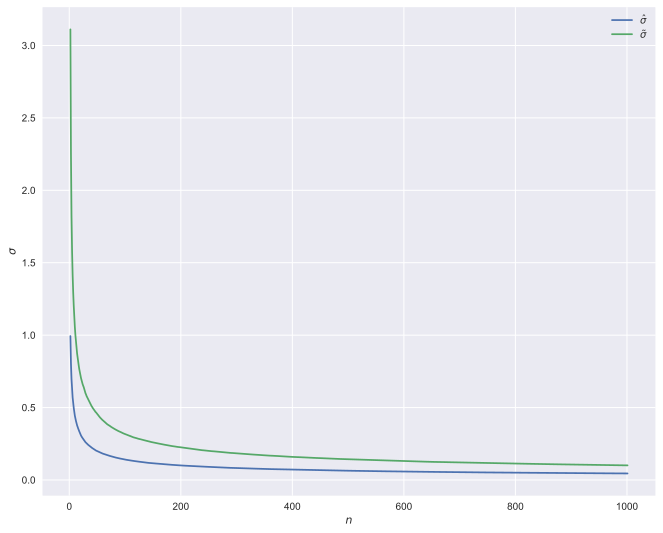

In [205]:
x=np.linspace(2,1001,999)
plt.plot(x, std_1, label = r'$\hat\sigma$')
plt.plot(x, std_2, label = r'$\tilde\sigma$')
plt.xlabel('$n$')
plt.ylabel('$\sigma$')
plt.legend(loc='upper right');

Можем видеть, что при увеличении n, std средних в обоих случаях приближается к нулю. Однако, при небольших значениях n мы имеем высокую std в обоих случаях, причем для $\tilde\sigma$ стандартное отклонение особенно высоко и  в общем случае для $\tilde\sigma$  std будет выше, чем для $\hat\sigma$

Вывод: для уменьшения разброса средних значений в выборках  необходимо увеличивать размер выборки  и пользоваться оценкой $\hat\sigma$